<a href="https://colab.research.google.com/github/Nathan-oc/Estudos-DSNP/blob/main/Lista_de_Exerc%C3%ADcios_R%C3%89PLICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lista de Exercícios

A lista de exercícios tem por objetivo colocar a mão na massa e relembrar os conceitos que foram passados nas aulas anteriores.

Optei por não necessariamente seguir a sequencia das aulas, colocando os exercícios 

## Exercício 1

* Importar o pacote Pandas
* importar os dados de ocorrências da aviação civil neste link
* Ver qual o tamanho (linhas x colunas) do *DataFrame*
* Verificar as 5 primeiras 

**Importe o Pandas e importe os dados de ocorrências da aviação civil que se encontram em `csv` [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv).**

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv")

In [ ]:
#@title
# importar pandas
import pandas as pd

# importar dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/ocorrencias_aviacao.csv")

**Veja qual o tamanho (linhas e colunas) do conjunto de dados importado.**

In [ ]:
df.shape

(5208, 22)

In [ ]:
#@title
df.shape

**Identifique o tipo de cada coluna (inteiro, float, object).**

In [ ]:
df.dtypes

codigo_ocorrencia                   int64
ocorrencia_classificacao           object
ocorrencia_tipo                    object
ocorrencia_tipo_categoria          object
ocorrencia_tipo_icao               object
ocorrencia_latitude               float64
ocorrencia_longitude              float64
ocorrencia_cidade                  object
ocorrencia_uf                      object
ocorrencia_pais                    object
ocorrencia_aerodromo               object
ocorrencia_dia                     object
ocorrencia_horario                 object
investigacao_aeronave_liberada     object
investigacao_status                object
divulgacao_relatorio_numero        object
divulgacao_relatorio_publicado     object
divulgacao_dia_publicacao          object
total_recomendacoes                 int64
total_aeronaves_envolvidas          int64
ocorrencia_saida_pista             object
ocorrencia_dia_extracao            object
dtype: object

In [ ]:
#@title
df.dtypes

**Veja as 3 primeiras entradas do conjunto de dados.**

In [ ]:
df.head(3)

,codigo_ocorrencia,ocorrencia_classificacao,ocorrencia_tipo,ocorrencia_tipo_categoria,ocorrencia_tipo_icao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,...,ocorrencia_horario,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_dia_extracao
0,201305055424986,ACIDENTE,FALHA DO MOTOR EM VOO,FALHA OU MAU FUNCIONAMENTO DO MOTOR,SCF-PP,-9.9085,-63.0333,ARIQUEMES,RO,BRASIL,...,11:00:00,NaN,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28
1,201605160250139,INCIDENTE GRAVE,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,COLISÃO COM OBSTÁCULO DURANTE A DECOLAGEM E POUSO,CTOL,-11.2644,-61.2589,CACOAL,RO,BRASIL,...,19:19:00,SIM,ATIVA,IG-084/CENIPA/2016,NÃO,NaN,0,1,NÃO,2018-08-28
2,201805021421302,INCIDENTE,AERÓDROMO,AERÓDROMO,ADRM,-11.4956,-61.4508,CACOAL,RO,BRASIL,...,22:40:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO,2018-08-28


In [ ]:
#@title
df.head(3)

**Veja quantos valores únicos existem para a coluna `ocorrencia_classificacao`**

In [ ]:
df.ocorrencia_classificacao.unique()

array(['ACIDENTE', 'INCIDENTE GRAVE', 'INCIDENTE'], dtype=object)

In [ ]:
#@title
df.ocorrencia_classificacao.unique()

**Descubra qual Estado possui o maior número de ocorrências com aeronaves civis.**

In [ ]:
df.ocorrencia_uf.value_counts(ascending = False)

SP     1207
RJ      498
MG      476
PR      437
RS      350
GO      268
PA      255
MT      244
AM      219
BA      208
SC      160
DF      151
MS      132
PE       88
CE       75
ES       66
MA       63
TO       54
AC       53
RR       50
PI       39
RO       30
PB       20
SE       18
AL       16
RN       15
AP       13
***       3
Name: ocorrencia_uf, dtype: int64

In [ ]:
df.ocorrencia_uf.value_counts(ascending = False).index[0]

'SP'

In [ ]:
#@title
# a resposta é SP, com 1.207 ocorrências
df.ocorrencia_uf.value_counts()

**Quantos por cento das ocorrências são do tipo `FALHA DO MOTOR EM VOO`?**

In [ ]:
df[df['ocorrencia_tipo'] == 'FALHA DO MOTOR EM VOO'].shape[0] / df.shape[0]

0.13095238095238096

In [ ]:
#@title
df.loc[df.ocorrencia_tipo == "FALHA DO MOTOR EM VOO"].shape[0] / df.shape[0]

## Exercício 2

Você irá trabalhar agora com os dados da ação BBAS3, do Banco do Brasil na BOVESPA.

Na variável `df_bbas3`, foi importado [este arquivo `csv`](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/BBAS3.SA.csv), onde o *index* do *DataFrame* representa os valores da ação para determinado dia. Responda as perguntas abaixo.

In [ ]:
# importar pandas
import pandas as pd

# importar o csv com dados da BBAS3
df_bbas3 = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/BBAS3.SA.csv",
                       index_col="Date")

**Veja as 5 primeiras entradas da variável `df_bbas3`.**

In [ ]:
df_bbas3.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-21,29.730000,30.580000,29.340000,30.580000,28.680056,16301600
2018-09-24,30.379999,30.700001,29.500000,29.730000,27.882866,13086900
2018-09-25,29.030001,29.760000,28.809999,29.549999,27.714045,11742900
2018-09-26,29.650000,29.969999,29.209999,29.450001,27.620264,12842400
2018-09-27,29.680000,30.299999,29.680000,30.290001,28.408072,8767900


In [ ]:
#@title
df_bbas3.head()

**Quais são os valores da ação para o dia 04 de outubro de 2018?**

In [ ]:
df_bbas3.loc['2018-10-04']

Open         3.368000e+01
High         3.588000e+01
Low          3.352000e+01
Close        3.512000e+01
Adj Close    3.293799e+01
Volume       2.792000e+07
Name: 2018-10-04, dtype: float64

In [ ]:
#@title
df_bbas3.loc["2018-10-04"]

**Qual a média do Volume financeiro movimentado em todo o período?**

In [ ]:
df_bbas3.Volume.mean()

11928526.016260162

In [ ]:
#@title
df_bbas3.Volume.mean()

## Exercício 3

Você irá trabalhar agora com os dados do projeto +BIKE, usado em aulas passadas.

Na variável df_bike, foi importado [este arquivo csv](http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv).



In [ ]:
# importar pandas
import pandas as pd

# importar o csv com dados da BBAS3
df_bike = pd.read_csv("http://dl.dropboxusercontent.com/s/yyfeoxqw61o3iel/df_rides.csv")

# ver as primeiras entradas
df_bike.head()

,user_gender,user_birthdate,user_residence,ride_date,time_start,time_end,station_start,station_end,ride_duration,ride_late
0,M,1971-06-08,NaN,2018-01-01,06:05:18,06:21:33,11 - Rodoviária 2,41 - Instituto de Artes,16.250000,0.0
1,M,1989-02-11,DF,2018-01-01,06:27:01,06:32:17,26 - Ministério da Saude,28 - CNMP - Conselho Nacional do Ministério Pú...,5.266667,0.0
2,M,1968-07-19,NaN,2018-01-01,06:29:33,06:44:57,11 - Rodoviária 2,43 - Biblioteca Central,15.400000,0.0
3,M,1991-12-19,NaN,2018-01-01,06:53:53,06:59:45,10 - Ministério dos Transportes,6 - Rodoviária,5.866667,0.0
4,M,1969-03-03,DF,2018-01-01,06:58:56,17:40:04,15 - Brasil 21,11 - Rodoviária 2,641.133333,1.0


**Qual a porcentagem de valores ausentes para a coluna `user_gender`?**


In [ ]:
df_bike.user_gender.isnull().sum() / df_bike.shape[0]

0.0013782446175371187

In [ ]:
#@title
df_bike.user_gender.isnull().sum() / df_bike.shape[0]

**Preencha a coluna `user_gender` com o valor mais frequente.**

In [ ]:
ug_moda = df_bike.user_gender.mode()[0]
df_bike.user_gender.fillna(ug_moda, inplace=True)

In [ ]:
#@title
# ver o valor mais frequente
print(df.user_gender.value_counts())

# preencher os valores ausentes de user_gender com 'M'
df.user_gender.fillna('M', inplace=True)

**Plote u boxplot para a coluna `ride_duration`.**

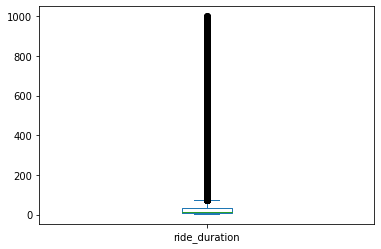

In [ ]:
df_bike.ride_duration.plot(kind='box')

In [ ]:
#@title
df_bike.ride_duration.plot(kind="box")